# Описание задачи

## Введение. Описание предметной области

Компания Tour & Travels предлагает своим клиентам пакет страхования путешествий.

Новый страховой пакет также включает покрытие Covid.

Компании необходимо знать, какие клиенты были бы заинтересованы в ее покупке, основываясь на истории своей базы данных.
Страхование было предложено некоторым клиентам в 2019 году, и данные были извлечены из показателей производительности/продаж пакета за этот период.

## Постановка задачи

Необходимо построить интеллектуальную модель, которая может предсказать, будет ли клиент заинтересован в покупке пакета страхования путешествий на основе определенных параметров, приведенных ниже в таблице.

## Данные

### Количество данных

- Объем данных (N) - 1987;
- Количество признаков (d) - 9;
- Количество классов (K) - 2.

### Описание данных

1. Id - уникальный идентификационный номер клиента;
2. Age - возраст клиента;
3. Employment Type - сектор, в котором работает клиент;
4. GraduateOrNot - является ли клиент выпускником колледжа или нет;
5. AnnualIncome - годовой доход клиента в индийских рупиях (округленный до ближайших 50 тысяч рупий);
6. FamilyMembers - количество членов семьи клиента;
7. ChronicDiseases - страдает ли клиент каким-либо серьезным заболеванием или состояниями, такими как диабет / высокое кровяное давление или астма и т. д;
8. FrequentFlyer - часто ли клиент покупал авиабилеты за последние 2 года (2017-2019);
9. EverTravelledAbroad - выезжал ли клиент когда-либо в другую страну (не обязательно пользуясь услугами компании);
10. TravelInsurance - купил ли клиент пакет страхования путешествий во время вводного предложения, проведенного в 2019 году.



Ссылка на датасет: [Travel insurance prediction data](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data).

# Лабораторная №1

# Решение поставленной задачи

In [32]:
import pandas
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

## Чтение данных

In [33]:
data = pandas.read_csv("TravelInsurancePrediction.csv")

data.head(5)  # Визуально проверяем первые 5 строк данных

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [34]:
data.shape  # Проверяем размер таблицы

(1987, 10)

## Типы данных

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


- Пропущенные значения отсутствуют. Попробуем сымитировать такие значения в дальнейшем;
- Некоторые категориальные признаки имеют тип object. Необходимо выставить корректные типы данных для признаков;
- Некоторые признаки являются бинарными (Yes/No), но имеют тип object. Необходимо перевести данные в тип int64.

In [37]:
data = data.drop("Unnamed: 0", axis=1)  # Также избавимся от ненужного признака-идентификатора

In [38]:
# Переводим в категиориальный тип данных
data["Employment Type"] = data["Employment Type"].astype("category")

# Приводим Yes/No данные в бинарный (целочисленный) тип
data["GraduateOrNot"] = pandas.factorize(data["GraduateOrNot"])[0]
data["FrequentFlyer"] = pandas.factorize(data["FrequentFlyer"])[0]
data["EverTravelledAbroad"] = pandas.factorize(data["EverTravelledAbroad"])[0]

data.dtypes

Age                       int64
Employment Type        category
GraduateOrNot             int64
AnnualIncome              int64
FamilyMembers             int64
ChronicDiseases           int64
FrequentFlyer             int64
EverTravelledAbroad       int64
TravelInsurance           int64
dtype: object

## Имитируем пропущенные значения

In [39]:
np.random.seed(10)

remove_n = int(data.shape[0] * (data.shape[1] - 1) * 0.03)  # Удаляем 3% данных от общего числа всех признаков

drop_indices = np.random.choice(data.index, remove_n)
for idx in drop_indices:
    colIdx = random.randint(0, 7)  # Cтолбец с классом не трогаем
    data.loc[idx, data.columns[colIdx]] = None

In [40]:
data.head(15)  # Визуально проверяем None-элементы

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31.0,Government Sector,0.0,NaN,6.0,1.0,0.0,0.0,0
1,31.0,Private Sector/Self Employed,0.0,1250000.0,7.0,0.0,0.0,0.0,0
2,34.0,Private Sector/Self Employed,0.0,500000.0,4.0,NaN,0.0,0.0,1
3,28.0,Private Sector/Self Employed,0.0,700000.0,3.0,1.0,0.0,0.0,0
4,28.0,Private Sector/Self Employed,0.0,700000.0,8.0,1.0,NaN,0.0,0
5,25.0,Private Sector/Self Employed,1.0,NaN,4.0,0.0,0.0,0.0,0
6,31.0,Government Sector,0.0,1300000.0,4.0,0.0,0.0,0.0,0
7,31.0,Private Sector/Self Employed,0.0,1350000.0,3.0,0.0,1.0,1.0,1
8,28.0,Private Sector/Self Employed,0.0,1450000.0,6.0,1.0,1.0,1.0,1
9,33.0,Government Sector,0.0,800000.0,3.0,0.0,1.0,0.0,0


In [41]:
data.isna().sum()  # Число пропущенных значений

Age                    67
Employment Type        61
GraduateOrNot          65
AnnualIncome           57
FamilyMembers          61
ChronicDiseases        53
FrequentFlyer          46
EverTravelledAbroad    62
TravelInsurance         0
dtype: int64

In [42]:
data.count()

Age                    1920
Employment Type        1926
GraduateOrNot          1922
AnnualIncome           1930
FamilyMembers          1926
ChronicDiseases        1934
FrequentFlyer          1941
EverTravelledAbroad    1925
TravelInsurance        1987
dtype: int64

## Заполняем пропущенные значения медианными

In [43]:
category = data.describe(include=["category"])

# Исправляем категориальные признаки
data["Employment Type"].fillna(category["Employment Type"].top, inplace = True)

# Исправляем численные признаки
data["Age"].fillna(data["Age"].median(axis = 0), inplace = True)
data["AnnualIncome"].fillna(data["AnnualIncome"].median(axis = 0), inplace = True)
data["FamilyMembers"].fillna(data["FamilyMembers"].median(axis = 0), inplace = True)
data["ChronicDiseases"].fillna(data["ChronicDiseases"].median(axis = 0), inplace = True)

data["GraduateOrNot"].fillna(data["GraduateOrNot"].median(axis = 0), inplace = True)
data["FrequentFlyer"].fillna(data["FrequentFlyer"].median(axis = 0), inplace = True)
data["EverTravelledAbroad"].fillna(data["EverTravelledAbroad"].median(axis = 0), inplace = True)

# После имитации пропущенных значений, некоторые признаки стали типом float из-за наличия None-значений
# Возвращаем к исходному
data["Age"] = data["Age"].astype("int64")
data["AnnualIncome"] = data["AnnualIncome"].astype("int64")
data["FamilyMembers"] = data["FamilyMembers"].astype("int64")
data["ChronicDiseases"] = data["ChronicDiseases"].astype("int64")

data["GraduateOrNot"] = data["GraduateOrNot"].astype("int64")
data["FrequentFlyer"] = data["FrequentFlyer"].astype("int64")
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].astype("int64")

data["TravelInsurance"] = data["TravelInsurance"].astype("int64")

data.head(15)  # Визуально проверяем отсуствие None-элементов

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,0,900000,6,1,0,0,0
1,31,Private Sector/Self Employed,0,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,0,500000,4,0,0,0,1
3,28,Private Sector/Self Employed,0,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,0,700000,8,1,0,0,0
5,25,Private Sector/Self Employed,1,900000,4,0,0,0,0
6,31,Government Sector,0,1300000,4,0,0,0,0
7,31,Private Sector/Self Employed,0,1350000,3,0,1,1,1
8,28,Private Sector/Self Employed,0,1450000,6,1,1,1,1
9,33,Government Sector,0,800000,3,0,1,0,0


In [44]:
data.isna().sum()  # Число пропущенных значений

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Больше пропущенных значений нет.

## Визуализация данных. Подсчёт основных характеристик

### Исследование количественных признаков

In [45]:
data.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.628586,0.144439,9.341721e+05,4.756417,0.267237,0.203322,0.186714,0.357323
std,2.871352,0.351623,3.718674e+05,1.582588,0.442629,0.402571,0.389780,0.479332
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,0.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


- Средний возраст клиентов - 29-30 лет;
- Только 15% клиентов имеют высшее образование;
- Средняя зарплата клиентов - 933014.6 рупий;
- Среднее число членов семьи клиента - 5;
- 27% клиентов имеют хронические заболевания;
- 20% пользовались услугами компании ранее;
- Только 18.5% клиентов бывали ранее в других странах;
- 36% клиентов приобретали предлагаемую страхову.

### Исследование категориальных признаков

In [46]:
data.describe(include=['category'])

,Employment Type
count,1987
unique,2
top,Private Sector/Self Employed
freq,1433


### Исследование корреляционной матрицы

In [47]:
corrMat = data.corr(numeric_only=True)

corrMat

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.022145,-0.027036,0.027839,0.012369,-0.037004,-0.021238,0.059890
GraduateOrNot,-0.022145,1.000000,-0.097070,-0.017275,-0.018431,0.034315,-0.057264,-0.016585
AnnualIncome,-0.027036,-0.097070,1.000000,-0.005998,0.004603,0.341376,0.463665,0.389513
FamilyMembers,0.027839,-0.017275,-0.005998,1.000000,0.025405,-0.012323,-0.021738,0.083598
ChronicDiseases,0.012369,-0.018431,0.004603,0.025405,1.000000,-0.045110,0.020007,0.007741
FrequentFlyer,-0.037004,0.034315,0.341376,-0.012323,-0.045110,1.000000,0.258535,0.226084
EverTravelledAbroad,-0.021238,-0.057264,0.463665,-0.021738,0.020007,0.258535,1.000000,0.421594
TravelInsurance,0.059890,-0.016585,0.389513,0.083598,0.007741,0.226084,0.421594,1.000000


<Axes: >

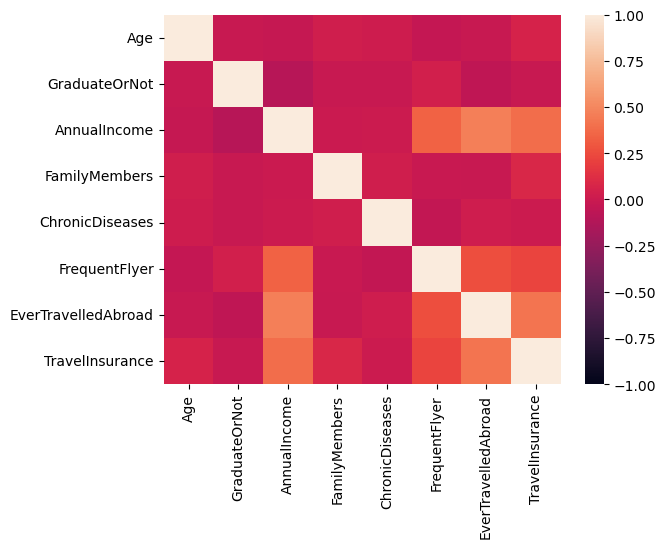

In [48]:
import seaborn

# Пробуем построить график корреляции по таблице
seaborn.heatmap(corrMat,
                vmin=-1.0,
                vmax=1.0)

Были замечены довольно светлые участки корреляции на графике: AnnualIncome-EverTravelledAbroad и EverTravelledAbroad-TravelInsurance. Изучим конкретные значения.

In [49]:
corrMat["EverTravelledAbroad"]["AnnualIncome"]

0.4636649015684189

Данное значение говорит о корреляционной зависимости данных параметров.
EverTravelledAbroad - выезжал ли клиент когда-либо в другую страну.
AnnualIncome - доход клиента.

Эта зависимость объясняется довольно просто. Очевидно, чем больше доход у человека, тем больше свободных у него средств для осуществления путешествий в другие страны.

In [50]:
corrMat["EverTravelledAbroad"]["TravelInsurance"]

0.42159442957182236

Данное значение также говорит о корреляционной зависимости.
TravelInsurance - купил ли клиент пакет страхования путешествий.

Эта зависимость объясняется корреляционной зависимостью выше. Маловероятно, что человек, небывавший в других странах, приобретет пакет страхования.

Проверим также корреляционную зависимость TravelInsurance и AnnualIncome.

In [51]:
corrMat["TravelInsurance"]["AnnualIncome"]

0.3895134193254662

Значение, конечно, меньше, но корреляционная зависимость всё же присутвует. Чем выше доход у человека, тем выше его обеспокоенность за собственную жизнь - тем чаще он покупает пакет страхования.

In [52]:
corrMat["FrequentFlyer"]["AnnualIncome"]

0.3413755658033783

Здесь также можно увидеть очевидную связь параметров.

FrequentFlyer - часто ли клиент покупал авиабилеты за последние 2 года.

Данная корреляция обуславливается связью EverTravelledAbroad и AnnualIncome параметров

In [53]:
print(corrMat["TravelInsurance"]["ChronicDiseases"])
print(corrMat["TravelInsurance"]["Age"])

0.007740864232984039
0.05989047900859783


К моему удивлению, корреляционных зависимостей между данными параметрами не обнаружилось.

## Сбалансированность классов

0.6426774031202819
0.3573225968797182


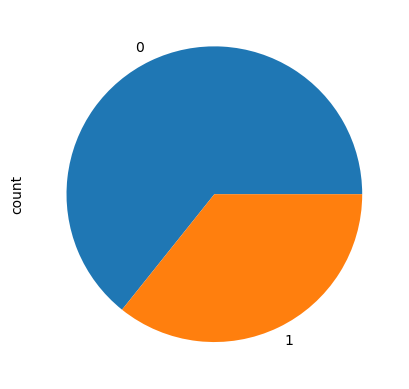

In [54]:
import collections

print(collections.Counter(data["TravelInsurance"])[0]/data.shape[0])
print(collections.Counter(data["TravelInsurance"])[1]/data.shape[0])

data["TravelInsurance"].value_counts().plot.pie();

Классы несбалансированны. Соотношение составляет 65 к 35.

## Дополнительная обработка категориальных признаков

Yes/No признаки в начале были отформатированы как бинарные. Остался признак Employment Type, который также является бинарным, можно перевести его в тип int64.

In [55]:
data["Employment Type"] = pandas.factorize(data["Employment Type"])[0]

data.head(5)  # Визуально проверяем форматирование

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,0,900000,6,1,0,0,0
1,31,1,0,1250000,7,0,0,0,0
2,34,1,0,500000,4,0,0,0,1
3,28,1,0,700000,3,1,0,0,0
4,28,1,0,700000,8,1,0,0,0


## Нормализация данных

Нормализация позволяет значительно повысить скорость сходимости алгоритма обучения нейронной сети. Если не провести нормализацию, то входные данные будут оказывать дополнительное влияние на нейрон, что может привести к неверным решениям.

В целях повышения точности классификации, нормализуем данные нашей таблицы.

In [56]:
# Исключаем столбец классов из данных
classes = data["TravelInsurance"]
data = data.drop("TravelInsurance", axis=1)

# Стандартизируем
normalized = data - data.mean(axis=0)
normalized = normalized / data.std(axis=0)
normalized.head(5)  # Визуально проверяем нормализацию

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.477620,-1.607900,-0.410778,-0.091893,0.785791,1.655481,-0.505058,-0.479024
1,0.477620,0.621616,-0.410778,0.849302,1.417667,-0.603750,-0.505058,-0.479024
2,1.522424,0.621616,-0.410778,-1.167546,-0.477962,-0.603750,-0.505058,-0.479024
3,-0.567184,0.621616,-0.410778,-0.629719,-1.109838,1.655481,-0.505058,-0.479024
4,-0.567184,0.621616,-0.410778,-0.629719,2.049544,1.655481,-0.505058,-0.479024


In [57]:
normalized.describe()  # Проверяем значения среднеквадратичного отклонения после нормализации

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03,1.987000e+03
mean,4.563816e-16,1.251585e-16,1.162186e-17,-1.966777e-17,-2.503170e-16,-7.956505e-17,-8.492899e-17,-3.665356e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.611988e+00,-1.607900e+00,-4.107780e-01,-1.705372e+00,-1.741715e+00,-6.037502e-01,-5.050576e-01,-4.790237e-01
25%,-5.671844e-01,-1.607900e+00,-4.107780e-01,-8.986325e-01,-4.779618e-01,-6.037502e-01,-5.050576e-01,-4.790237e-01
50%,-2.189163e-01,6.216164e-01,-4.107780e-01,-9.189329e-02,1.539145e-01,-6.037502e-01,-5.050576e-01,-4.790237e-01
75%,8.258877e-01,6.216164e-01,-4.107780e-01,8.493024e-01,7.857909e-01,1.655481e+00,-5.050576e-01,-4.790237e-01
max,1.870692e+00,6.216164e-01,2.433180e+00,2.328324e+00,2.681420e+00,1.655481e+00,1.978976e+00,2.086529e+00


## Тестовая и тренировочная выборки

Разбивать датасет будем по правилу 80 на 20.

In [58]:
from sklearn.model_selection import train_test_split

X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(normalized,
                                                                        classes,
                                                                        test_size = 0.2,
                                                                        random_state = np.random.RandomState(0))

print("X", "train:", X_train_data.shape, "test:", X_test_data.shape)
print("Y", "train:", len(Y_train_data), "test:", len(Y_test_data))

X train: (1589, 8) test: (398, 8)
Y train: 1589 test: 398


## Классификатор ближайших соседей

In [59]:
%%time
from sklearn.neighbors import KNeighborsClassifier

error_list = list()

# Проходимся по 1-30 соседям
for k in range(1, 31):
    kNN = KNeighborsClassifier(n_neighbors = k).fit(X_train_data, Y_train_data)
    X_tr_pred = kNN.predict(X_train_data)
    X_te_pred = kNN.predict(X_test_data)
    trError   = np.mean(Y_train_data != X_tr_pred)
    testError = np.mean(Y_test_data  != X_te_pred)
    error_list.append(testError)
    print("k = ", k, ", error on train =", trError)
    print("k = ", k, ", error on test  =", testError)
    print("/********************************************/")

k =  1 , error on train = 0.09062303335431089
k =  1 , error on test  = 0.29396984924623115
/********************************************/
k =  2 , error on train = 0.1485210824417873
k =  2 , error on test  = 0.21608040201005024
/********************************************/
k =  3 , error on train = 0.1422278162366268
k =  3 , error on test  = 0.21105527638190955
/********************************************/
k =  4 , error on train = 0.16740088105726872
k =  4 , error on test  = 0.1984924623115578
/********************************************/
k =  5 , error on train = 0.16928886091881687
k =  5 , error on test  = 0.2185929648241206
/********************************************/
k =  6 , error on train = 0.17998741346758967
k =  6 , error on test  = 0.20100502512562815
/********************************************/
k =  7 , error on train = 0.18439269981120202
k =  7 , error on test  = 0.2236180904522613
/********************************************/
k =  8 , error on train = 0.1875

In [60]:
print("Наилучшая точность на тестовой выборке:", 1 - min(error_list))
print("При k =", error_list.index(min(error_list)) + 1)

Наилучшая точность на тестовой выборке: 0.8065326633165829
При k = 8


## SVM.SVC классификатор

In [61]:
%%time
from sklearn.svm import SVC

SVC = SVC(decision_function_shape='ovo').fit(X_train_data, Y_train_data)
X_tr_pred = SVC.predict(X_train_data)
X_te_pred = SVC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.8225298930144745
Показатель точности на тестовой выборке: 0.8115577889447236
CPU times: total: 31.2 ms
Wall time: 154 ms


## Gradient boosting классификатор

In [62]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=15, max_depth=6).fit(X_train_data, Y_train_data)
X_tr_pred = GBC.predict(X_train_data)
X_te_pred = GBC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.8458149779735683
Показатель точности на тестовой выборке: 0.8165829145728644
CPU times: total: 46.9 ms
Wall time: 7.33 s


## Классификатор дерева решений

In [63]:
%%time
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier().fit(X_train_data, Y_train_data)
X_tr_pred = DTC.predict(X_train_data)
X_te_pred = DTC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.9301447451227187
Показатель точности на тестовой выборке: 0.7437185929648241
CPU times: total: 0 ns
Wall time: 10.3 ms


## Случайный лес

In [64]:
%%time
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=np.random.RandomState(0)).fit(X_train_data, Y_train_data)
X_tr_pred = RFC.predict(X_train_data)
X_te_pred = RFC.predict(X_test_data)
trError   = np.mean(Y_train_data != X_tr_pred)
testError = np.mean(Y_test_data  != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.8382630585273757
Показатель точности на тестовой выборке: 0.8316582914572864
CPU times: total: 0 ns
Wall time: 15.9 ms


## Выводы по классификациям

Классификатор ближайших соседей: наибольший показатель точности в рамках данного классификатора составил ~79% при k = 10.

Наибольший показатель точности среди всех использованных классификаторах показал классификатор RandomForestClassifier (случайный лес). Значение составило ~82%.

Эмпирическим путём для данного классификатора были подобраны следующие параметры:
- n_estimators = 10;
- max_depth = 6.

# Выводы по проделанной работе

В ходе проделанной работы:
- Был проведён анализ характеристик по входным данным:
    - Классы выборки оказались несбалансированными (65:35);
    - Были выявлены и объяснены корреляционные зависимости между различными параметрами;
    - Были составлены таблицы по основным характеристикам.
- Был сымитирован (и исправлен) случай пропущенных значений;
- Входные данные были подготовлены (т.е. отформатированы и нормализованы) для подачи их на вход алгоритмам классификации;
- Готовые данные были разделены на тренировочную и тестовую выборки в соостветсвии с правилом 80 на 20;
- Произведены эксперименты с разными алгоритами классификации над входными данными.

В результате экспериметов:
- Найден оптимальный параметр и наилучший показатель точности алгоритма kNN;
- Был найден алгоритм, незначительно увеличивающий показатель точности в сравнении с kNN, но сильно уступающий в результатах замера времени.